# CPSC 330 hw8

In [1]:
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)
import pandas as pd

## Submission Instructions
rubric={points:5}

Follow the [homework submission instructions](https://github.students.cs.ubc.ca/cpsc330-2019w-t2/home/blob/master/docs/homework_instructions.md). 

Furthermore, this assignment has an **additional submission requirement** outlined in Exercise 3.

<br>**Contribution statement: both partners cintributed equally to this assignment as we worked on it simulatneously at all times.**

## Dataset

Choose one of the following datasets:

| Description | Where it's from | Type of problem |
|------------|------------------|-----------------|
| Movie reviews |  lecture 5 | language data + binary classification
| Adult census |  lecture 7 | binary classification
| House prices |  lecture 9 | regression
| Amazon product ratings |  lecture 15 | unsupervised / nearest neighbours
| Rain in Australia | lecture 16 | time series + binary classification
| Churn prediction | lecture 17 | survival analysis
| New York City Airbnb listings |  hw5 | regression
| Donald Trump's tweets |  hw6 | language data, regression
| Avocado prices |  hw7 | time series + regression
| Another dataset of your chosing | ? | ? |

**IMPORTANT NOTE:** If you are using one of the course datasets, you are welcome to reuse code from the course: lecture code, my homework solution code, your homework solution code, etc. The idea is to reduce the time spent on writing code so that you can focus on the communication aspect. If you reuse code, please make a brief note of it explaining where you got the code from.

If you choose the last option ("Another dataset") then the above will not apply, of course. So, the last option would potentially be a lot more work if you are starting from scratch, but I wanted to give you the option in case you really want to, or in case you have a personal project with code already written. If you choose this option and you incorporate code that was written by someone else, you MUST cite this code. 

You are also welcome to use one of the course datasets but focus on a different problem, e.g. binary classification of whether avocado price increased vs. decreased in the last week, or try to predict a different column of a dataset, etc. Just make sure to clearly state what you're doing.

## Exercise 1
rubric={points:5}

For your dataset, describe your goal (e.g. what you are trying to predict). Then, describe a (possibly fictional) scenario where someone in the real world is interested in this task and why it is useful to them. What is the **decision** that ML is going to help make (see lecture 21) and what are the alternatives?

Max 1 paragraph total.

**Answer:**
We are using the New York city Airbnb listings from homework 5 to predict the `Price` of an Airbnb listing. This is a regression problem because price is a numerical value. In a real life scenario, given an individual who wants to list his/her place on Airbnb, it would be useful to be able to predict what price his/her Airbnb listing should be on Airbnb based on factors such as room type, neighbourhood and location coordinates. This way, the person who wants to put up the listing can know how much his/her room is worth based on market trends in order to avoid underpricing (which would reduce profits) or overpricing (which would reduce attraction/demand) the place. The factors mentioned above are consistent in that the person cannot change the location or room-type to increase listing price. If the goal of the owner is to maximize profits, it would also be useful to know what values to set for other features that he/she has control over such as minimum number of nights for stay (i.e. `minimum_nights`), number of days when listing is available for booking (`availability_365`), number of reviews (can be controlled by insisting guests to send reviews) or the amount of listings per host (`calculated_host_listings_count`). Depending on which features have the most importance and most signficant positive correlation with price of a listing, hosts can geer their efforts towards improving those feature values that can push higher prices for their listing and eventually, maximize profits from their Airbnb listing. After all, that is a good purpose to strive for in real-life. To answer the question precisely, the decision that ML will help make is 1) what price to set for a host's Airbnb listing, in which case the decision variable is the numeric variable `price` and 2) what features a host should pay attention to in order to push his/her listing's price higher. Both of these decisions directly benefit the host of an Airbnb listing and ML in this case, is made to help hosts make their listing price decision. The latter is an alternative to what the machine learning model prediction on price can be used for by a host. Other alternative host decisions can include: whether or not to list his/her Airbnb listing at a pre-determined price (classification problem) or even whether the host should spend more time requesting for reviews from guests given the importance of # of reviews in price (determined by feature importance on price prediction).

## Exercise 2
rubric={points:10}

Build a model for your chosen problem. Your work must involve the following elements:

- Exploratory outlier detection. 
- Preprocessing: DONE
- Try some models includng, at least, the 3 steps discussed in lecture 20:
    1. `DummyRegressor` or `DummyClassifer`
    2. `HuberRegressor` or `LogisticRegression`
    3. `CatBoostRegressor` or `CatBoostClassifier`
- Hyperparameter tuning.

Note: for the outlier detection, if you are using a dataset from lecture, please do not do not exactly the same thing that was done in lecture 19. For example, consider a scatter plot of two features or look at a different feature than what we did in lecture.

Note: if you have trouble installing CatBoost you are welcome to substitute in XGBoost or LightGBM instead. Hopefully one of them will be easy to install. 

Note: you're not required to use the "proper handling of categorical features" in CatBoost, though it would be fun if you do!

Note: remember, you're allowed to reuse code from the course! My intention is that you shouldn't spend a huge amount of time on this exercise. Maybe 1 hour?

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
# import shap
from sklearn.linear_model import Lasso

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
plt.rcParams['font.size'] = 14


In [3]:
df = pd.read_csv('./AB_NYC_2019.csv')
df_train, df_test = train_test_split(df, test_size=0.1, random_state=123)
df_train, df_valid = train_test_split(df_train, test_size=0.25, random_state=123)
df_train.head()

id                                               name    host_id  \
36323  28908658  Small Reasonable stay in NYC 3min Subway Grand...  204704622   
14968  11910257                  Cozy Nest 15 Minutes From Midtown   50661711   
691      256328          Luxury Chelsea Townhouse at the High Line    1347034   
21454  17138076                      Pop up room, 5 minutes to jfK  114975592   
1015     412180  Morocco in Brooklyn with the flyest loft, Amaz...    2051961   

              host_name neighbourhood_group        neighbourhood  latitude  \
36323            Momoyo              Queens             Elmhurst  40.74035   
14968              Cory           Manhattan   Washington Heights  40.83288   
691              Janine           Manhattan              Chelsea  40.74599   
21454  John And Colleen              Queens  Springfield Gardens  40.66663   
1015                Kim            Brooklyn   Bedford-Stuyvesant  40.69321   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
36323  -73.87617     Private room     29              29                  1   
14968  -73.94306     Private room     70               1                  0   
691    -74.00253  Entire home/apt    760               2                  7   
21454  -73.76417     Private room     60               1                 37   
1015   -73.94420  Entire home/apt     95               5                  9   

      last_review  reviews_per_month  calculated_host_listings_count  \
36323  2019-06-20               1.00                               7   
14968         NaN                NaN                               1   
691    2019-06-22               0.08                               1   
21454  2018-10-03               1.53                               4   
1015   2018-09-03               0.10                               1   

       availability_365  
36323                 6  
14968                 0  
691                 361  
21454                84  
1015                  0

In [4]:
## 1) Preprocessing

target_name = 'price'
y_train = df_train[target_name]
y_valid = df_valid[target_name]
y_test  = df_test[target_name]


In [5]:
##It seems that listings with 0 reviews have `reviews_per_month` set to NaN instead of 0. I will fix this:

categorical_features = ['neighbourhood', 'neighbourhood_group', 'room_type']
drop_features        = ['id', 'name', 'host_id', 'last_review', 'host_name']
numeric_features     = ['reviews_per_month','latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']
# len(pd.value_counts(df_train.host_name).index)
# df_train.shape
assert sorted(df.columns) == sorted(categorical_features + drop_features + numeric_features + [target_name])

# ##fill_na imputer
df_train.loc[:, numeric_features[:1]] = df_train.loc[:, numeric_features[:1]].fillna(value=0.00)
df_valid.loc[:,numeric_features[:1]] = df_valid.loc[:,numeric_features[:1]].fillna(value=0.00)
df_test.loc[:,numeric_features[:1]] = df_test.loc[:,numeric_features[:1]].fillna(value=0.00)
## numeric_imputer
for numeric_feature in numeric_features[1:]:
    df_train.loc[: , numeric_feature] = df_train.loc[:,numeric_feature].fillna(value=df_train.loc[:,numeric_feature].median())
    df_valid.loc[: , numeric_feature] = df_valid.loc[:,numeric_feature].fillna(value=df_valid.loc[:,numeric_feature].median())
    df_test.loc[: , numeric_feature] = df_test.loc[:,numeric_feature].fillna(value=df_test.loc[:,numeric_feature].median())
##categorical_imputer
for categorical_feature in categorical_features[1:]:
    df_train.loc[: , categorical_feature] = df_train.loc[:,categorical_feature].fillna(value=df_train.loc[:,categorical_feature].mode()[0])
    df_valid.loc[: , categorical_feature] = df_valid.loc[:,categorical_feature].fillna(value=df_valid.loc[:,categorical_feature].mode()[0])
    df_test.loc[: , categorical_feature] = df_test.loc[:,categorical_feature].fillna(value=df_test.loc[:,categorical_feature].mode()[0])
df_train


/Users/farhankassam/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


id                                               name    host_id  \
36323  28908658  Small Reasonable stay in NYC 3min Subway Grand...  204704622   
14968  11910257                  Cozy Nest 15 Minutes From Midtown   50661711   
691      256328          Luxury Chelsea Townhouse at the High Line    1347034   
21454  17138076                      Pop up room, 5 minutes to jfK  114975592   
1015     412180  Morocco in Brooklyn with the flyest loft, Amaz...    2051961   
...         ...                                                ...        ...   
41225  32066991  Studio to yourself! In artsy bushwick railroad...   33386742   
48481  36279099        PRIME LOCATION, Private 2BR in UNION SQUARE  264621546   
11338   8809578                  Beautiful Quiet Chelsea Apartment   14914020   
7260    5320983  Beautiful bright renovated 2BR w Balcony-sleep...     588270   
45963  35007081                  Amazing 3 bedroom in Williamsburg    3005203   

              host_name neighbourhood_group        neighbourhood  latitude  \
36323            Momoyo              Queens             Elmhurst  40.74035   
14968              Cory           Manhattan   Washington Heights  40.83288   
691              Janine           Manhattan              Chelsea  40.74599   
21454  John And Colleen              Queens  Springfield Gardens  40.66663   
1015                Kim            Brooklyn   Bedford-Stuyvesant  40.69321   
...                 ...                 ...                  ...       ...   
41225             Jayme            Brooklyn         Williamsburg  40.70298   
48481           Marcelo           Manhattan         East Village  40.73123   
11338             Cihan           Manhattan              Chelsea  40.74420   
7260              Dikla            Brooklyn                DUMBO  40.70430   
45963           Elnadiv            Brooklyn         Williamsburg  40.71697   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
36323  -73.87617     Private room     29              29                  1   
14968  -73.94306     Private room     70               1                  0   
691    -74.00253  Entire home/apt    760               2                  7   
21454  -73.76417     Private room     60               1                 37   
1015   -73.94420  Entire home/apt     95               5                  9   
...          ...              ...    ...             ...                ...   
41225  -73.93834     Private room     80               1                  0   
48481  -73.98896  Entire home/apt    400               2                  0   
11338  -74.00123  Entire home/apt    250               1                  1   
7260   -73.98667  Entire home/apt    189               2                177   
45963  -73.94227  Entire home/apt    295               2                  1   

      last_review  reviews_per_month  calculated_host_listings_count  \
36323  2019-06-20               1.00                               7   
14968         NaN               0.00                               1   
691    2019-06-22               0.08                               1   
21454  2018-10-03               1.53                               4   
1015   2018-09-03               0.10                               1   
...           ...                ...                             ...   
41225         NaN               0.00                               1   
48481         NaN               0.00                               1   
11338  2015-12-16               0.02                               1   
7260   2019-06-09               3.33                               2   
45963  2019-06-16               1.00                               3   

       availability_365  
36323                 6  
14968                 0  
691                 361  
21454                84  
1015                  0  
...                 ...  
41225                 5  
48481                90  
11338                 0  
7260                235  
459

In [6]:
transformers=[
    ('scale',  StandardScaler(), numeric_features),
    ('ohe',    OneHotEncoder(drop='first', sparse=False), categorical_features[1:]),
    ('ohe-nodrop', OneHotEncoder(handle_unknown='ignore', sparse=False), categorical_features[:1])]
    ## nodrop for the `neighbourhood` feature because there exists unknown categories, for which we also want a separate column.


In [7]:
preprocessor = ColumnTransformer(transformers=transformers)

In [8]:
preprocessor.fit(df_train);

In [9]:
# pd.value_counts(df_train.host_name).index.values
new_columns = numeric_features + list(preprocessor.named_transformers_['ohe'].get_feature_names(categorical_features[1:])) + list(preprocessor.named_transformers_['ohe-nodrop'].get_feature_names(categorical_features[:1]))
new_columns

['reviews_per_month',
 'latitude',
 'longitude',
 'minimum_nights',
 'number_of_reviews',
 'calculated_host_listings_count',
 'availability_365',
 'neighbourhood_group_Brooklyn',
 'neighbourhood_group_Manhattan',
 'neighbourhood_group_Queens',
 'neighbourhood_group_Staten Island',
 'room_type_Private room',
 'room_type_Shared room',
 'neighbourhood_Allerton',
 'neighbourhood_Arden Heights',
 'neighbourhood_Arrochar',
 'neighbourhood_Arverne',
 'neighbourhood_Astoria',
 'neighbourhood_Bath Beach',
 'neighbourhood_Battery Park City',
 'neighbourhood_Bay Ridge',
 'neighbourhood_Bay Terrace',
 'neighbourhood_Bay Terrace, Staten Island',
 'neighbourhood_Baychester',
 'neighbourhood_Bayside',
 'neighbourhood_Bayswater',
 'neighbourhood_Bedford-Stuyvesant',
 'neighbourhood_Belle Harbor',
 'neighbourhood_Bellerose',
 'neighbourhood_Belmont',
 'neighbourhood_Bensonhurst',
 'neighbourhood_Bergen Beach',
 'neighbourhood_Boerum Hill',
 'neighbourhood_Borough Park',
 'neighbourhood_Breezy Point',
 

In [10]:
X_train = pd.DataFrame(preprocessor.transform(df_train), index=df_train.index, columns=new_columns)
X_valid = pd.DataFrame(preprocessor.transform(df_valid), index=df_valid.index, columns=new_columns)
X_test  = pd.DataFrame(preprocessor.transform(df_test),  index=df_test.index,  columns=new_columns)
X_train

reviews_per_month  latitude  longitude  minimum_nights  \
36323          -0.058053  0.207851   1.643929        1.033301   
14968          -0.676170  1.905091   0.201065       -0.288485   
691            -0.626720  0.311303  -1.081744       -0.241278   
21454           0.269549 -1.144365   4.059848       -0.288485   
1015           -0.614358 -0.656819   0.176475       -0.099658   
...                  ...       ...        ...             ...   
41225          -0.676170 -0.477612   0.302879       -0.288485   
48481          -0.676170  0.040566  -0.789030       -0.241278   
11338          -0.663807  0.278470  -1.053702       -0.288485   
7260            1.382160 -0.453400  -0.739633       -0.241278   
45963          -0.058053 -0.220999   0.218106       -0.241278   

       number_of_reviews  calculated_host_listings_count  availability_365  \
36323          -0.498280                       -0.005969         -0.810536   
14968          -0.520581                       -0.186449         -0.856170   
691            -0.364469                       -0.186449          1.889477   
21454           0.304585                       -0.096209         -0.217293   
1015           -0.319865                       -0.186449         -0.856170   
...                  ...                             ...               ...   
41225          -0.520581                       -0.186449         -0.818141   
48481          -0.520581                       -0.186449         -0.171659   
11338          -0.498280                       -0.186449         -0.856170   
7260            3.426837                       -0.156369          0.931163   
45963          -0.498280                       -0.126289          1.562433   

       neighbourhood_group_Brooklyn  neighbourhood_group_Manhattan  \
36323                           0.0                            0.0   
14968                           0.0                            1.0   
691                             0.0                            1.0   
21454                           0.0                            0.0   
1015                            1.0                            0.0   
...                             ...                            ...   
41225                           1.0                            0.0   
48481                           0.0                            1.0   
11338                           0.0                            1.0   
7260                            1.0                            0.0   
45963                           1.0                            0.0   

       neighbourhood_group_Queens  ...  neighbourhood_West Village  \
36323                         1.0  ...                         0.0   
14968                         0.0  ...                         0.0   
691                           0.0  ...                         0.0   
21454                         1.0  ...                         0.0   
1015                          0.0  ...                         0.0   
...                           ...  ...                         ...   
41225                         0.0  ...                         0.0   
48481                         0.0  ...                         0.0   
11338                         0.0  ...                         0.0   
7260                          0.0  ...                         0.0   
45963                         0.0  ...                         0.0   

       neighbourhood_Westchester Square  neighbourhood_Whitestone  \
36323                               0.0                       0.0   
14968                               0.0                       0.0   
691                                 0.0                       0.0   
21454                               0.0                       0.0   
1015                                0.0                       0.0   
...                                 ...                       ...   
41225                               0.0                       0.0   
48481                               0.0                

In [11]:
## Extracted from hw5:
X_train = X_train.drop(['number_of_reviews'], axis=1)
X_valid = X_valid.drop(['number_of_reviews'], axis=1)
X_test = X_test.drop(['number_of_reviews'], axis=1)

from sklearn.feature_extraction.text import CountVectorizer

## convert elements in the name feature column to be of unicode string type:

names_train = df_train['name'].values.astype('str');
names_valid = df_valid['name'].values.astype('str');
names_test = df_test['name'].values.astype('str');
df_train['name'] = names_train
df_valid['name'] = names_valid
df_test['name'] = names_test

count_vec = CountVectorizer(max_features=100, stop_words='english') ##filters out English stop words due to large frequency of use.
count_vec.fit(df_train['name']);


count_vec.fit(df_train['name']); # this should work now
word_feature_names = ['name_' + word for word in count_vec.get_feature_names()]

X_train_name = pd.DataFrame(data=count_vec.transform(df_train["name"]).toarray(), columns=word_feature_names, index=X_train.index)
X_valid_name = pd.DataFrame(data=count_vec.transform(df_valid["name"]).toarray(), columns=word_feature_names, index=X_valid.index)
X_test_name  = pd.DataFrame(data=count_vec.transform(df_test["name"]).toarray(),  columns=word_feature_names, index=X_test.index)

X_train_words = pd.concat((X_train, X_train_name), axis=1)
X_valid_words = pd.concat((X_valid, X_valid_name), axis=1)
X_test_words  = pd.concat((X_test, X_test_name),   axis=1)


# lightgbm requires column-names to be valid JSON names
X_train_words.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in X_train_words.columns]
X_test_words.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in X_test_words.columns]

X_train_words.columns

/Users/farhankassam/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


Index(['reviews_per_month', 'latitude', 'longitude', 'minimum_nights',
       'calculated_host_listings_count', 'availability_365',
       'neighbourhood_group_Brooklyn', 'neighbourhood_group_Manhattan',
       'neighbourhood_group_Queens', 'neighbourhood_group_Staten_Island',
       ...
       'name_townhouse', 'name_train', 'name_upper', 'name_uws', 'name_view',
       'name_views', 'name_village', 'name_west', 'name_williamsburg',
       'name_york'],
      dtype='object', length=330)

In [12]:
## Benchmark score with DummyRegressor
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import HuberRegressor, LinearRegression
from sklearn.datasets import make_regression

def show_scores_factory(X_train, y_train, X_test, y_test):
    def show_scores(model):
        model.fit(X_train, y_train);
        return model.score(X_test, y_test)
    return show_scores


dm = DummyRegressor(strategy="mean")
show_scores_model = show_scores_factory(X_train_words, y_train, X_test_words, y_test)
show_scores_model(dm)


-8.975734754401721e-05

In [107]:
## 2) Hyperparameter tuning:

## HuberRegressor: hyperparameters: alpha, epsilon

alpha_range = []
for i in range(-2, 4):
    alpha_range.append(10.0**i)
print(alpha_range)

param_grid = {
    "alpha"         : alpha_range,
    "epsilon"       : [1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 40.0]
}

hb_regressor = HuberRegressor()
grid_search = GridSearchCV(hb_regressor, param_grid, cv=3, verbose=2, n_jobs=-1)
grid_search.fit(X_train_words, y_train)
print(grid_search.score(X_test_words, y_test))
print("Best parameters: ", grid_search.best_params_, "\n")

[0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
Fitting 3 folds for each of 42 candidates, totalling 126 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   57.5s
[Parallel(n_jobs=-1)]: Done 126 out of 126 | elapsed:  2.9min finished


0.17773033044625397
Best parameters:  {'alpha': 0.1, 'epsilon': 16.0} 



In [108]:

## LightGBM: hyperparameters: num_leaves, max_depth, min_data_in_leaf

import scipy.stats
!pip install lightgbm
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV



param_dist = {
    "num_leaves"     : scipy.stats.randint(low=1, high=500),
    "max_depth"        : scipy.stats.randint(low=10, high=500),
    "min_data_in_leaf": scipy.stats.randint(low=100, high=2000),
    "n_estimators" : scipy.stats.randint(low=5, high=500)
}


gbm_regressor = lgb.LGBMRegressor(learning_rate=0.05)
random_search = RandomizedSearchCV(gbm_regressor, param_distributions = param_dist, 
                                   n_iter = 10, 
                                   cv=3,
                                   verbose=1, random_state=123, n_jobs=-1)

random_search.fit(X_train_words, y_train)
print(random_search.score(X_test_words, y_test))
print("Best parameters: ", random_search.best_params_, "\n")

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    8.1s finished


0.24689572129754442
Best parameters:  {'max_depth': 461, 'min_data_in_leaf': 102, 'n_estimators': 345, 'num_leaves': 40} 



In [141]:
##3) Model score summaries on test set:
print("DummyRegressor: ", dm.score(X_test_words, y_test))
print("HuberRegressor: ", grid_search.best_estimator_.score(X_test_words, y_test))
print("LGBMRegressor: ", random_search.best_estimator_.score(X_test_words, y_test))

DummyRegressor:  -8.975734754401721e-05
HuberRegressor:  0.17773033044625397
LGBMRegressor:  0.24689572129754442


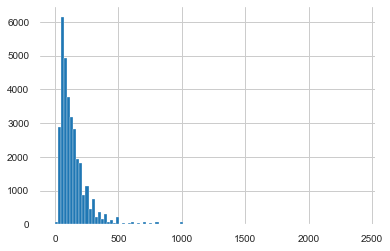

In [112]:
##4) Exploratory outlier detection: Price vs. 
## TODO: Plot price vs minimum_nights
## use dbscan to find outliers

price_of_listing = df_train["price"]

# price for listings per night
price_histogram = price_of_listing[price_of_listing < 2500].hist(bins=100)

The price per night outliers are at price 2000 and price 1500

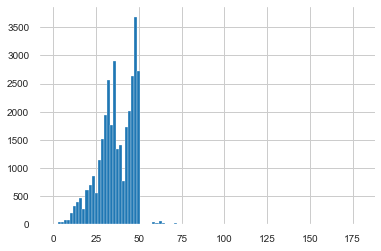

In [113]:
# outlier of name lengths
df_train["name"].apply(len).hist(bins=100);

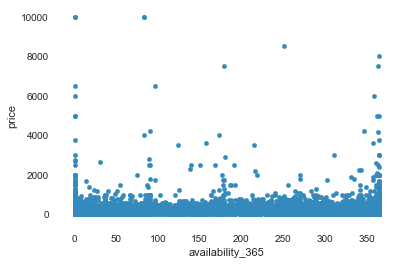

In [114]:
df_train.plot.scatter(x="availability_365", y="price");

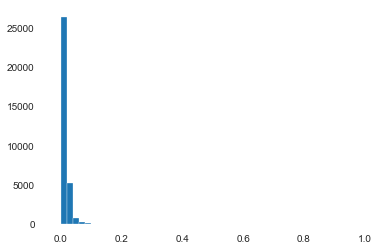

In [115]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()
price_mm = mm.fit_transform(df_train[["price"]])
plt.hist(price_mm, bins=50);





In [116]:
np.percentile(price_mm, 95) # 95 percent of the price values are less than 0.036 scaled value

0.036000000000000004

In [117]:
print(mm.inverse_transform(np.array(0.036000000000000004).reshape(1, -1)))


[[360.]]


In [118]:
print(price_mm.max()) ##shows that some listings have prices that are much larger than a signficant portion of the listings (~95%)
print(mm.inverse_transform(np.array(1.0).reshape(1, -1)))

1.0
[[10000.]]


In [119]:
print(np.std(df_train['price']))
print(np.mean(df_train['price']))
print(np.std(df_train['price']) / np.mean(df_train['price']))


236.75147277025195
153.1696512438263
1.5456813464527264


The above values show that mean price per listing is 153 however, we see that the standard deviation is 236. That means that we have very large error bars of up to 236 dollars, which is the average deviation away from the mean listing price of ~$154. That is a high deviation away from the average!

In [120]:
# dbscan for outlier detection, price vs. minimum_nights
from sklearn.cluster import DBSCAN
# this code was taken from support_functions.py from the lecture github repo
def plot_clust(X,W=None,z=None):
    if z is not None:
        if np.any(z<0):
            plt.scatter(X[z<0,0], X[z<0,1], marker="o", 
                        facecolors='none', edgecolor='black', alpha=0.3);
        if np.any(z>=0):
            plt.scatter(X[z>=0,0], X[z>=0,1], marker="o", c=z[z>=0], alpha=0.3);
    else:
        plt.scatter(X[:,0], X[:,1], marker="o", c='black', alpha=0.3);
    if W is not None:
        plt.scatter(W[:,0], W[:,1], marker="^", s=200, c=np.arange(W.shape[0]));
    else:
        plt.title("number of clusters = %d" % len(set(np.unique(z))-set([-1])));

(-50, 2000)

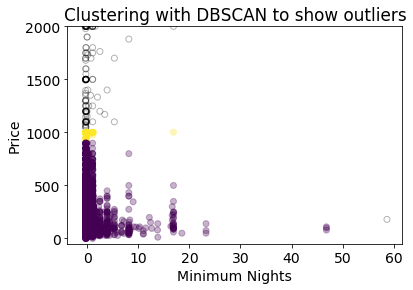

In [30]:
x = X_train['minimum_nights']
y = y_train

X = np.concatenate((x[:,None], y[:,None]), axis=1)


dbscan = DBSCAN(eps=40, min_samples=30, n_jobs=-1)
dbscan.fit(X)
plot_clust(X, z=dbscan.labels_)
plt.title("Clustering with DBSCAN to show outliers")
plt.xlabel("Minimum Nights")
plt.ylabel("Price")
plt.ylim(-50, 2000)

DBSCAN is an unsupervised model that is helping us to detect outliers in the figure above, which shows data points mapped for two features namely: minimum nights and price.

## Exercise 3
rubric={points:40}

In a **separate Jupyter notebook from this one**, write up your results in a "blog post" or report format that is aimed at a **potentially non-technical decision-maker or stakeholder**. Your post must include the following elements (not necessarily in this order):

- Describe the problem/decision.
- Describing the dataset (the raw data and/or some EDA).
- Describing the model.
- Describing your results, both quantitatively and qualitatively. Make sure to refer to the original problem/decision.
- A section on caveats, describing at least 3 reasons why your results might be incorrect, misleading, overconfident, or otherwise problematic. Make reference to your specific dataset, model, approach, etc. To check that your reasons are specific enough, make sure they would not make sense, if left unchanged, to most students' submissions; for example, do not just say "overfitting" without explaining why you might be worried about overfitting in your specific case.
- At least 2 visualizations.

A reasonable length for your entire post would be **1000 words**. The maximum allowed is 2000 words.

**SUBMISSION REQUIREMENT:** Upload your blog post to your homework repository. Then, put a clickable link to your blog post in your homework repository README. Thus, your README should now have two links: one to this document and one to your blog post. Please test both of them out in your web browser and make sure that both of them work as intended.

Note: Exercise 2 is separate from this because we want to see all your code in Exercise 2. Your blog post should have a lot less code than Exercise 2, if any.

#### A note on plagiarism

- In this assignment, you are allowed to include code that was not written by you, but you must cite the source.
- In this assignment, you are **NOT** allowed to include text or visualizations that were not written/created by you.

If you are in any doubt as to what constitutes plagiarism, please just ask.

For more information see the [UBC Academic Misconduct policies](http://www.calendar.ubc.ca/vancouver/index.cfm?tree=3,54,111,959).

**Pandas profiling report to view characteristics of the dataset (referred to in exercise 3 report):**


In [32]:
import numpy as np
import pandas as pd
# !pip install pandas_profiling
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title='Pandas Profiling Report', html={'style':{'full_width':True}})
# profile.to_widgets()
profile

**In example 1, we use the model to input a set of features for a new listing, given its characteristics. Then, we can use our best performing model (i.e. LRGBRegressor) to predict the price of this new listing based on past data on listing prices (used in exercise 3 report):**

In [136]:
# Dataframe with single new listing
data = np.array([[2549, "Vancouver Mansion", 4870, "Farhan",  "Manhattan", "East Harlem", 40.79234, -73.94356, "Entire home/apt", 200, 3, 47, "2019-06-21", 0.43, 4, 220]])
new_listing_df = pd.DataFrame(data = data, columns=df.columns)

# Preprocess the data
X_new_listing = pd.DataFrame(preprocessor.transform(new_listing_df), index=new_listing_df.index, columns=new_columns)

# Drop "number_of_reviews"
X_new_listing = X_new_listing.drop(['number_of_reviews'], axis=1)

# Count vectorizer
X_new_listing_name = pd.DataFrame(data=count_vec.transform(new_listing_df["name"]).toarray(), columns=word_feature_names, index=X_new_listing.index)
X_new_listing_words = pd.concat((X_new_listing, X_new_listing_name), axis=1)


# lightgbm requires column-names to be valid JSON names
X_new_listing_words.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in X_new_listing_words.columns]

X_new_listing_words
print ("Priced estimated by host: ", 200.00);
print("Predicted price: ", random_search.best_estimator_.predict(X_new_listing_words)[0])

Priced estimated by host:  200.0
Predicted price:  289.96620423971444


**Show feature importances of as well as positive and negative feature coefficients with the target label (i.e. price) using the LGBMRegressor and HuberRegressor models respectively (used in exercise 3 report):**

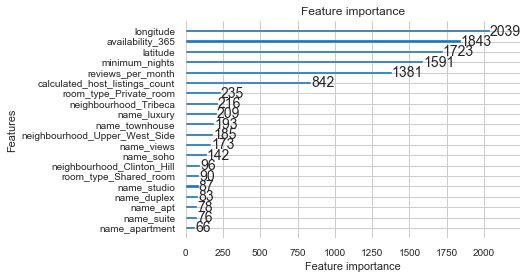

In [137]:
ax = lgb.plot_importance(random_search.best_estimator_, max_num_features=20)
plt.show()

In [215]:
hb_regressor_coefs = pd.DataFrame(data=grid_search.best_estimator_.coef_, index=X_train_words.columns, columns=["Feature Coefficients"])
hb_regressor_coefs.sort_values(by="Feature Coefficients", ascending=False)

Feature Coefficients
name_townhouse                               145.629246
neighbourhood_Tribeca                        138.235790
neighbourhood_Flatiron_District               67.513493
neighbourhood_group_Manhattan                 66.077458
neighbourhood_Brooklyn_Heights                63.504967
...                                                 ...
name_studio                                  -66.046790
neighbourhood_Inwood                         -67.334775
neighbourhood_group_Staten_Island            -88.663404
room_type_Private_room                       -94.942750
room_type_Shared_room                       -113.516595

[330 rows x 1 columns]

In [173]:
## Interpreting scaled numeric feature coefficients:

scaler = preprocessor.named_transformers_['scale']
numeric_features.append('number_of_reviews')
# hb_regressor_scales = pd.DataFrame(data=np.sqrt(scaler.var_), index=numeric_features, columns=["Scale"])

delta = scaler.inverse_transform(np.ones(len(numeric_features))) - scaler.inverse_transform(np.zeros(len(numeric_features)))
hb_regressor_scales = pd.DataFrame(data=delta, index=numeric_features, columns=["Scale"])
print(hb_regressor_scales)

data = []
numeric_features.remove("number_of_reviews")
for numeric_feature in numeric_features:
    scale = hb_regressor_scales.loc[numeric_feature, 'Scale']
    coefficient = hb_regressor_coefs.loc[numeric_feature, 'Feature Coefficients']      
    data.append([coefficient / scale]);
intuitive_table = pd.DataFrame(data=data, columns = ["Price change per increase by one unit ($)"], index=numeric_features)
intuitive_table


                                     Scale
reviews_per_month                 1.617817
latitude                          0.054518
longitude                         0.046359
minimum_nights                   21.183458
calculated_host_listings_count   44.839438
availability_365                 33.244747
number_of_reviews               131.480858


Price change per increase by one unit ($)
reviews_per_month                                               -5.723541
latitude                                                       -70.682085
longitude                                                     -347.402382
minimum_nights                                                  -0.234383
calculated_host_listings_count                                  -0.042433
availability_365                                                 0.608770

In [176]:
## To check which models overfit to the training set:
dmScores = [dm.score(X_train_words, y_train), dm.score(X_test_words, y_test)]
huberScores = [grid_search.best_estimator_.score(X_train_words, y_train), grid_search.best_estimator_.score(X_test_words, y_test)]
LGBMScores = [random_search.best_estimator_.score(X_train_words, y_train), random_search.best_estimator_.score(X_test_words, y_test)]

all_scores = pd.DataFrame(data = [dmScores, huberScores, LGBMScores], index=["DummyRegressor", "HuberRegressor", "LGBMRegressor"], columns = ["Training score", "Testing"])
all_scores

Training   Testing
DummyRegressor  0.000000 -0.000090
HuberRegressor  0.141323  0.177730
LGBMRegressor   0.362548  0.246896

In [219]:
## To check changing from one neighbourhood to another and effect on price change of a listing:
hb_regressor_coefs_neighbourhood = hb_regressor_coefs[hb_regressor_coefs.index.str.startswith("neighbourhood")]
hb_regressor_coefs_inwood = hb_regressor_coefs.loc["neighbourhood_Inwood"]
difference = (hb_regressor_coefs_neighbourhood - hb_regressor_coefs_inwood)
difference.sort_values(by='Feature Coefficients', ascending=False)



Feature Coefficients
neighbourhood_Tribeca                        205.570565
neighbourhood_Flatiron_District              134.848268
neighbourhood_group_Manhattan                133.412233
neighbourhood_Brooklyn_Heights               130.839742
neighbourhood_Midtown                        125.006869
...                                                 ...
neighbourhood_Morningside_Heights             23.616503
neighbourhood_Harlem                          15.879457
neighbourhood_Washington_Heights               6.036686
neighbourhood_Inwood                           0.000000
neighbourhood_group_Staten_Island            -21.328629

[222 rows x 1 columns]

In [204]:
hb_regressor_coefs_tribeca  = hb_regressor_coefs.loc["neighbourhood_Tribeca"]
hb_regressor_coefs_tribeca - 

Feature Coefficients    205.570565
dtype: float64

## Exercise 4
rubric={points:10}

- Describe one effective communication technique (lecture 21/22) that you used in your post, or an aspect of the post that you are particularly satisfied with.
- Describe an aspect of your post that you are not quite satisfied with, or one way in which your post could still be improved.

Max 1 paragraph total.

**Answer**: One aspect of the post we are particularly satisfied with is our discussion about the dataset and outlier detection. Before mentioning the findings of outliers in our data we discuses about the dataset. More specifically, the size of the dataset and the percentage of the dataset used to train the models on. We also discuss about missing values found in the dataset and the solutions we used to replace these values. We then briefly discuss about feature relations and then move on to outliers. This aspect of the post is particulary important because we take a bottom up approch to our goal that is, using machine learning to predict the prices of Airbnb listings. Our exploration of the dataset and conveying details to reader, provides a bases for understanding our models and the results achieved. We discuss which features might be related to predicting price and provide a correlation matrix to visually convey to the reader. To further communicate our findings, we describe new ideas using small chunks. We use a few graphs to visually describe the outliers as well as provide the code used, and a written explaination of the results from the graph describing the outliers and the method used to detect the outliers. One aspect where our post could have improved upon is the analysis of our results. More specifically we did not explore examples from all angles. That is we could have provided performance of our models with and without hyperparameter tuning. For example, in the description and analysis of our results section we discussed about the best scores obtained from DummyRegressor, HuberRegressor, and LGBMRegressor. However, we did not discuss the results of our model before hyperparameter tuning and after hyperparameter tuning. In fact, we did not discuss about hyperparameter tuning at all. We could have mentioned the hyperparameters we used that gave us the best results and code examples so that the reader has the ability to reproduce our results. We could have also improved our post by discussing the hyperparameters and what methods we used i.e. GridSearch and RandomSearch to obtain the best scores for our models. Furthermore, some aspects of our post assumes the reader is familiar with machine learning terminology and dive a little deeper in to the technical aspects of our results. This could be one area where we could have exercise restraint and keep our discussion focused towards a stricly non-technical audience.

## Exercise 5
rubric={points:15}

Create a visualization that is different from the ones in your report, which was crafted intentionally to mislead or misrepresent the results of your analysis. Include your visualization, and the code that generated it, here. Then, explain what you did: 

- What is the incorrect interpretation that your visualization is trying to show? 
- What is the correct interpretation?
- How would you fix your visualization?

Max 1 paragraph total.

(2500, 10000)

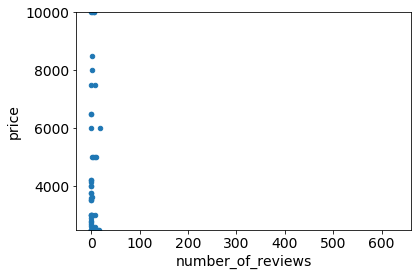

In [17]:
import matplotlib.pyplot as plt
df_train.plot.scatter(x="number_of_reviews", y="price");
plt.ylim(2500, 10000)

In [18]:
np.mean(df[['price']])

price    152.720687
dtype: float64

- The incorrect intepretation is that airbnb listings with a small number of reviews have a very large price compared to a mean price of 152 dollars per night. 
- The correct intepretation is that airbnb listings with a small number of reviews are clustered together into lower prices (as most data points with small # reviews are clustered around the lower price range in the original graph when the y-axis is not cut-out to start from 2500.
- We would not limit the y-axis to a range of (2500, 10000) and plot the scatter plot with y-axis (i.e. price) starting from 0.

## (optional) Exercise 6

Publish your blog post from Exercise 3 publicly using a tool like Hugo, and paste a link here. Be sure to pick a tool in which code and code output look reasonable. 

Note: this exercise is optional/bonus. If you do it, the grader will add **1 point** to your grade (probably by adding it to some arbitrary question, since I don't think our system handles bonus questions yet). Hopefully the main motivation for you to do this is for your portfolio/resume, not for the 1 point.

## Final sanity check

- Please revisit the **IMPORTANT NOTE** at the top to make sure you have appropriately cited your code.
- Please revisit the **SUBMISSION REQUIREMENT** in Exercise 3 to make sure you have those links in your README.

And that's it, you're done with homework assignments for CPSC 330!